# Load Data

In [256]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_reduced.csv', encoding='latin-1')
data.head()

,Unnamed: 0,drummer,session,id,style,simplified_style,bpm,beat_type,time_signature,midi_filename,...,rms_mean,rms_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_flatness_mean,spectral_flatness_std,tempogram_mean,tempogram_std
0,0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,funk,138,1,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,...,0.034636,0.058105,5335.603726,2688.930490,4615.955290,1007.859698,0.092827,0.133516,0.239535,0.137067
1,1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,funk,102,1,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,...,0.030456,0.063953,6338.191486,3683.342441,4989.509117,1157.665970,0.142638,0.155706,0.139604,0.163539
2,2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,funk,105,1,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,...,0.037484,0.067771,6077.338238,3792.722720,4680.404598,1377.311199,0.124579,0.146646,0.179192,0.130047
3,3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,funk,86,1,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,...,0.022330,0.049949,5542.225095,3417.495525,4875.089779,1265.250954,0.106046,0.138443,0.208746,0.174764
4,4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,funk,80,1,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,...,0.021056,0.051182,7714.574395,3887.263988,5119.254721,1091.703500,0.188627,0.157474,0.129188,0.149107


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1090 non-null   int64  
 1   drummer                  1090 non-null   object 
 2   session                  1090 non-null   object 
 3   id                       1090 non-null   object 
 4   style                    1090 non-null   object 
 5   simplified_style         1090 non-null   object 
 6   bpm                      1090 non-null   int64  
 7   beat_type                1090 non-null   int64  
 8   time_signature           1090 non-null   object 
 9   midi_filename            1090 non-null   object 
 10  audio_filename           1090 non-null   object 
 11  duration                 1090 non-null   float64
 12  split                    1090 non-null   object 
 13  onset_env_mean           1090 non-null   float64
 14  onset_env_std           

# Split labels and features

In [258]:
# seperate labels
y = data.simplified_style
# seperate data
X = data.iloc[:, :31]
# drop unnecessary data
X = X.drop(columns=["Unnamed: 0", "drummer", "session", "id", "midi_filename", "audio_filename", "style", "simplified_style", "split", ])
# time signature would be a nice feature, but they are 99% in 4/4. We might as well drop this column to pevent overfitting
X = X.drop(columns=["time_signature"])
# The model should be able to predict a genre independent of duration so it should be dropped.
# But duration also is an influence in some of the extracted audio features too. So i'm unsure if this could be benefcial to the interpretation of the extracted audio features.
# lets keep it for now
#X = X.drop(columns=["duration"])

In [259]:
# only labels
y.head()

0    funk
1    funk
2    funk
3    funk
4    funk
Name: simplified_style, dtype: object

In [260]:
# only features
X.tail()

,bpm,beat_type,duration,onset_env_mean,onset_env_std,mfcc_mean,mfcc_std,spectral_flux_mean,spectral_flux_std,spectral_contrast_mean,...,tonnetz_mean,tonnetz_std,rms_mean,rms_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_flatness_mean,spectral_flatness_std
1085,100,1,71.78000,0.700411,1.255718,-17.177755,80.723300,0.171760,0.367869,11.095754,...,-0.000483,0.038268,0.017097,0.026517,4798.587353,2262.243523,4202.586394,1143.580021,0.054484,0.086355
1086,100,1,4.74875,0.673706,1.405090,-22.172949,84.791030,0.103791,0.292991,11.249964,...,-0.000548,0.034618,0.010296,0.022294,5685.170684,1819.749391,4524.244019,929.885425,0.071707,0.090014
1087,100,1,23.93875,0.807790,1.839772,-17.393496,84.921295,0.210763,0.417661,9.719207,...,0.001560,0.037345,0.018970,0.029546,7167.742409,3295.887907,5292.859346,1174.628306,0.148190,0.145533
1088,100,1,11.20875,0.851409,1.907641,-15.513251,79.025314,0.232315,0.420945,9.661610,...,-0.000522,0.032503,0.022295,0.030756,6522.843388,3378.381352,5077.864282,1256.245421,0.144691,0.153425
1089,100,1,9.07125,0.793212,2.085934,-18.306368,86.349495,0.207478,0.445453,9.750525,...,0.005085,0.033875,0.018582,0.031919,6345.555826,2984.688599,5246.355254,1193.405366,0.110126,0.128023


In [261]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
label_encoder.fit(y)

LabelEncoder()

In [262]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train= label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Random Forest

In [263]:
import pickle
import os

path_data = 'datasets'

def grid_search_pickling_path(prefix: str, dictionary: dict):
    dict_string = str(dictionary).replace(":", "").replace("'", "").replace("{", "").replace("}", "").replace(" ", "")
    filename = f'{prefix}_grid_search-{dict_string}.pkl'
    return os.path.join(path_data, filename)

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV

def perform_and_plot_RNDForest_grid_search(parameters: dict, train_data, train_labels):
    filepath = grid_search_pickling_path("random_forest", parameters)
    try:
        with open(filepath, 'rb') as file:
            grid_search = pickle.load(file)
        print(f"Loaded GridSearchCV from {filepath}\n with best params: {grid_search.best_params_}")
    except:
        print(f"Found no GridSearchCV at {filepath}. Calculating...")

        model = RandomForestClassifier(random_state=42)
        # Wrap with MultiOutputClassifier
        multi_target_rf = MultiOutputClassifier(model, n_jobs=-1)
        
        # Perform grid search
        grid_search = GridSearchCV(multi_target_rf, parameters, verbose=0, scoring='accuracy', cv=5)
        grid_search.fit(train_data, train_labels)
        
        with open(filepath, 'wb') as file:
            pickle.dump(grid_search, file)
    
    # Collect grid search results
    cv_results = grid_search.cv_results_
    mean_test_scores = cv_results['mean_test_score']
    params = cv_results['params']

    # Prepare data for plotting
    # Prepare data for plotting
    scores_array = np.array(mean_test_scores).reshape(
        len(parameters['estimator__max_depth']),
        len(parameters['estimator__min_samples_leaf']),
        len(parameters['estimator__n_estimators'])
    )

    # Create a line plot for each n_estimators
    fig, ax = plt.subplots(figsize=(10, 6))

    for k, n_estimators in enumerate(parameters['estimator__n_estimators']):
        scores_for_n_estimators = scores_array[:, :, k].T
        for i, min_samples_leaf in enumerate(parameters['estimator__min_samples_leaf']):
            ax.plot(parameters['estimator__max_depth'], scores_for_n_estimators[i],
                    marker='o', linestyle='--', label=f'n_estimators: {n_estimators}, min_samples_leaf: {min_samples_leaf}')

    ax.set_title('Grid Search Results')
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Mean Test Score')
    ax.legend(loc='best')

    plt.show()
    
    return grid_search

# # Example usage
# parameters = {
#     'estimator__max_depth': [1, 2],
#     'estimator__min_samples_leaf': [2, 4],
#     'estimator__n_estimators': [3, 5, 10]
# }

# # Assume X_train and y_train are your training data and labels
# grid_search_result = perform_and_plot_RNDForest_grid_search(parameters, X_train, y_train)


In [265]:
n_estimators = 10
max_depth = 10
min_samples_leaf = 2

In [266]:
# Initialize the base classifier
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=10,
                       random_state=42)

### Evaluation

In [267]:
y_pred = random_forest.predict(X_test)

#### metrics

In [268]:
from sklearn.metrics import classification_report, hamming_loss
import seaborn as sns

def evaluate_model(model, X_validation, y_validation):
    y_predicted = model.predict(X_validation)
    
    print("Classification Report:")
    print(classification_report(y_validation, y_predicted, target_names=label_encoder.classes_))
    
    print("\nHamming Loss:", hamming_loss(y_validation, y_predicted))

In [269]:
evaluate_model(random_forest, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

        funk       0.72      0.56      0.63        61
      hiphop       0.53      0.47      0.50        19
        jazz       0.47      0.39      0.43        23
       latin       0.58      0.60      0.59        35
         pop       0.75      0.38      0.50         8
        rock       0.58      0.76      0.66        72

    accuracy                           0.60       218
   macro avg       0.61      0.53      0.55       218
weighted avg       0.61      0.60      0.60       218


Hamming Loss: 0.39908256880733944


#### feature importance

In [270]:
# create a dataframe with the name of a feature and its feature importance
def get_feature_importance_df(model, X):
    feature_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    return feature_importance_df

get_feature_importance_df(random_forest, X_train)

,Feature,Importance
0,bpm,0.134928
2,duration,0.078645
10,spectral_contrast_std,0.070127
9,spectral_contrast_mean,0.060916
8,spectral_flux_std,0.060644
14,rms_std,0.047278
17,spectral_bandwidth_mean,0.046842
7,spectral_flux_mean,0.046442
15,spectral_centroid_mean,0.043476
12,tonnetz_std,0.042863


#### confusion matrices

In [271]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def plot_confusion_matrix(confusion_matrix):
    # Get the actual labels
    labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    # Plot the confusion matrix using Seaborn's heatmap
    plt.figure(figsize=(14, 11), dpi=80)    
    sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 14},
                cmap='Blues', 
                fmt="g",
                xticklabels=labels, yticklabels=labels)

    # Set labels and title
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title('Confusion Matrix', fontsize=20)

    # Show the plot
    plt.show()

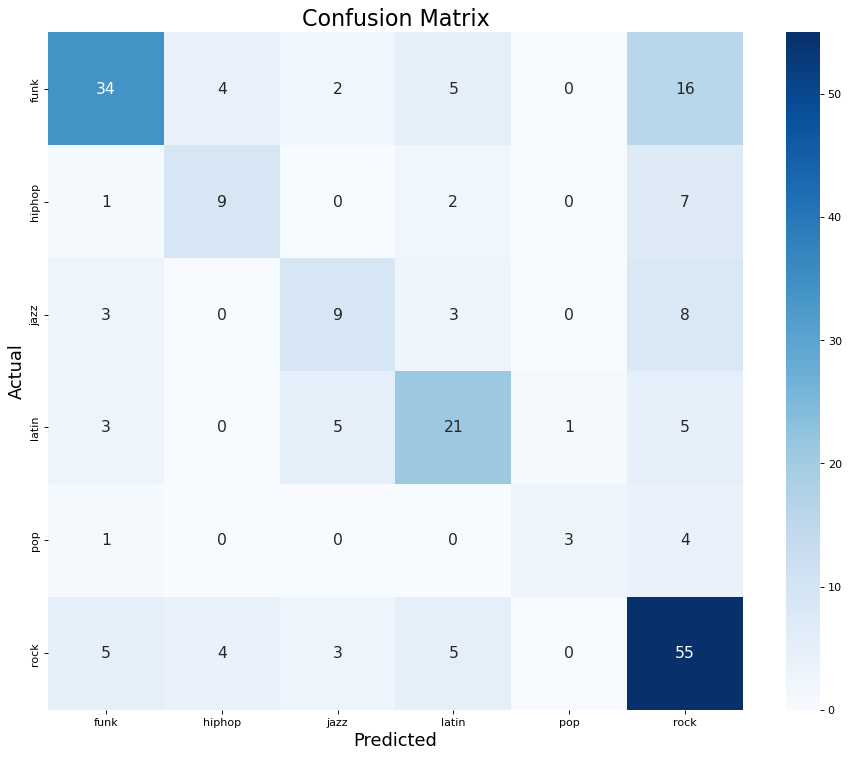

In [272]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_matrix)

#### shap

https://stackoverflow.com/questions/65549588/shap-treeexplainer-for-randomforest-multiclass-what-is-shap-valuesi

In [273]:
import shap

In [274]:
X

,bpm,beat_type,duration,onset_env_mean,onset_env_std,mfcc_mean,mfcc_std,spectral_flux_mean,spectral_flux_std,spectral_contrast_mean,...,tonnetz_mean,tonnetz_std,rms_mean,rms_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_flatness_mean,spectral_flatness_std
0,138,1,27.872308,0.820465,1.471963,-14.319676,73.690796,0.370578,0.803874,10.217504,...,-0.003644,0.048117,0.034636,0.058105,5335.603726,2688.930490,4615.955290,1007.859698,0.092827,0.133516
1,102,1,37.691158,0.673516,1.996858,-18.866692,81.949180,0.318956,0.836129,9.389001,...,0.000954,0.049296,0.030456,0.063953,6338.191486,3683.342441,4989.509117,1157.665970,0.142638,0.155706
2,105,1,36.351218,0.807532,1.771858,-15.552315,76.598114,0.430627,0.986051,9.708105,...,-0.000462,0.032169,0.037484,0.067771,6077.338238,3792.722720,4680.404598,1377.311199,0.124579,0.146646
3,86,1,44.716543,0.714612,1.739458,-18.966784,91.778990,0.261665,0.707281,9.359258,...,0.001330,0.041105,0.022330,0.049949,5542.225095,3417.495525,4875.089779,1265.250954,0.106046,0.138443
4,80,1,47.987500,0.617521,1.897261,-21.551086,84.417250,0.230317,0.718205,9.491370,...,0.002939,0.038458,0.021056,0.051182,7714.574395,3887.263988,5119.254721,1091.703500,0.188627,0.157474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,100,1,71.780000,0.700411,1.255718,-17.177755,80.723300,0.171760,0.367869,11.095754,...,-0.000483,0.038268,0.017097,0.026517,4798.587353,2262.243523,4202.586394,1143.580021,0.054484,0.086355
1086,100,1,4.748750,0.673706,1.405090,-22.172949,84.791030,0.103791,0.292991,11.249964,...,-0.000548,0.034618,0.010296,0.022294,5685.170684,1819.749391,4524.244019,929.885425,0.071707,0.090014
1087,100,1,23.938750,0.807790,1.839772,-17.393496,84.921295,0.210763,0.417661,9.719207,...,0.001560,0.037345,0.018970,0.029546,7167.742409,3295.887907,5292.859346,1174.628306,0.148190,0.145533
1088,100,1,11.208750,0.851409,1.907641,-15.513251,79.025314,0.232315,0.420945,9.661610,...,-0.000522,0.032503,0.022295,0.030756,6522.843388,3378.381352,5077.864282,1256.245421,0.144691,0.153425


In [277]:
label_encoder.classes_

array(['funk', 'hiphop', 'jazz', 'latin', 'pop', 'rock'], dtype=object)

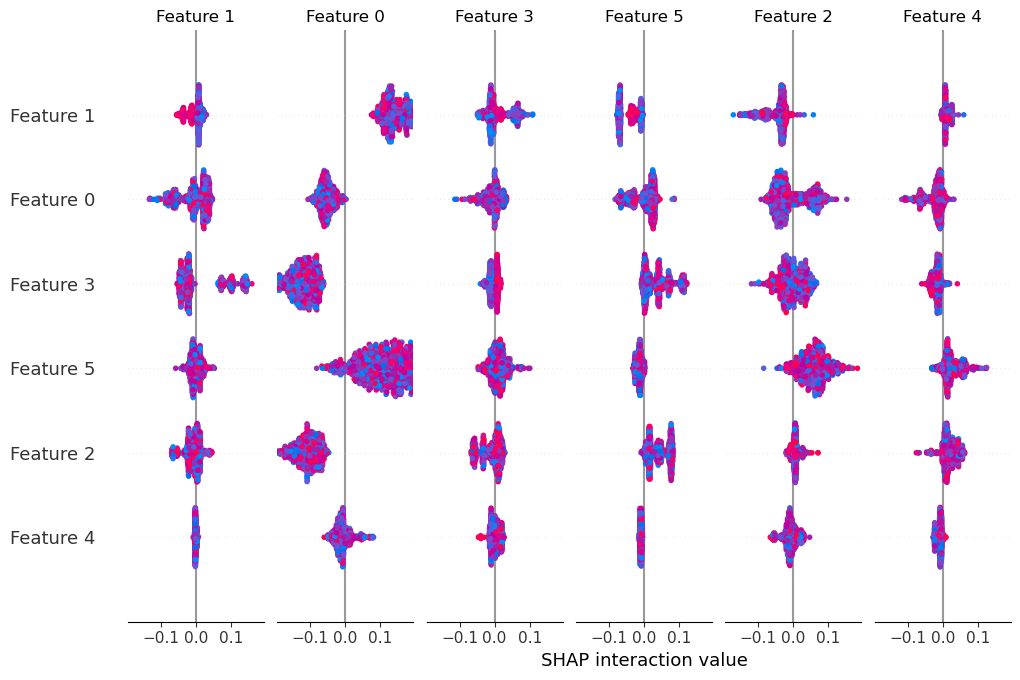

In [278]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar", class_names=label_encoder.classes_)

In [279]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from shap import TreeExplainer
from shap import summary_plot

X, y = make_classification(1000, 100, n_informative=8, n_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)

clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)
explainer = TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

explainer = shap.TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

shap_values = np.array(explainer.shap_values(X_train))
shap_values_ = shap_values.transpose((1,0,2))
print(shap_values[3].shape)

shap_values_ = shap_values.transpose((1,0,2))
print(np.allclose(
    clf.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
))

shap.summary_plot(shap_values[0],X_train)

(750, 100)
(750, 100, 10)
(750, 100, 10)
(100, 10)


ValueError: operands could not be broadcast together with shapes (100,750) (10,) 

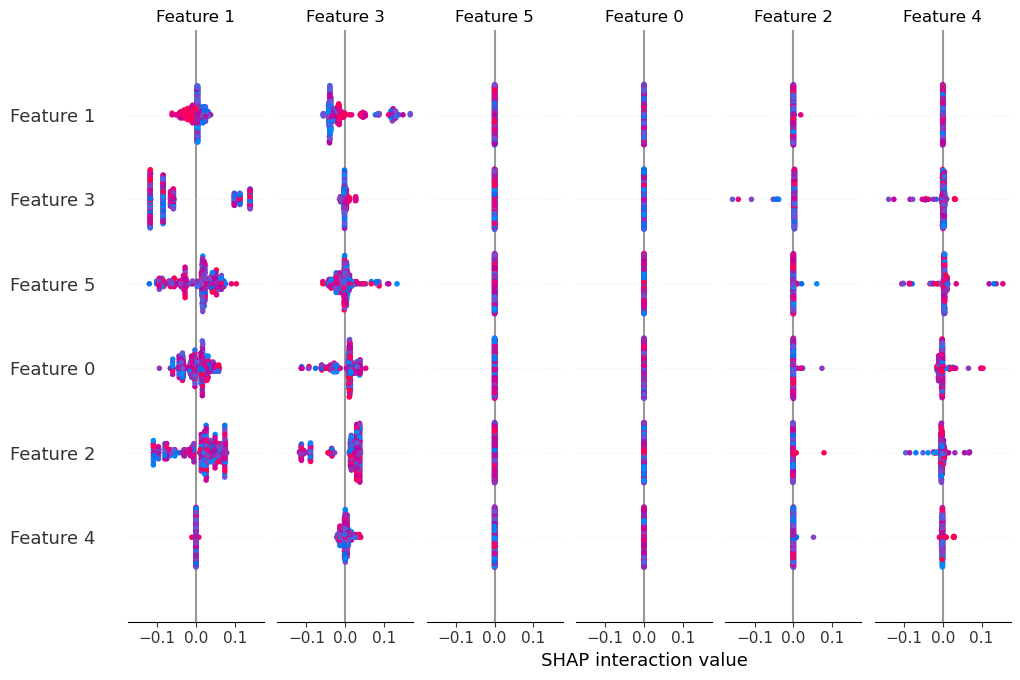

In [ ]:
# plot the SHAP values for the random forest model
explainer = shap.TreeExplainer(random_forest, X_test)

shap.summary_plot(explainer(X_test), X_test, plot_type='bar')

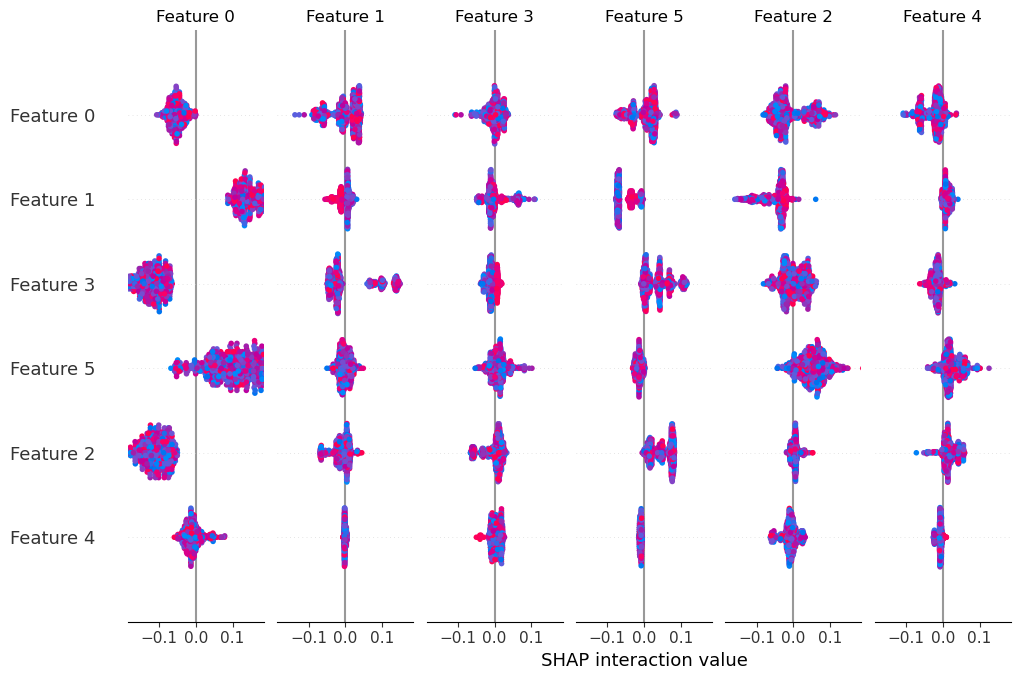

In [ ]:
# plot the SHAP values for the random forest model
explainer = shap.TreeExplainer(random_forest)

shap.summary_plot(explainer.shap_values(X_train), X_train, plot_type='bar')

In [ ]:
rf_explainer = shap.Explainer(random_forest)
rf_explainer.expected_value = rf_explainer.expected_value[0]  # Additional line to force the dim of base_values
rf_shap_values = rf_explainer(X_test)
shap.plots.beeswarm(rf_shap_values[:,"RM"], color=rf_shap_values)

IndexError: invalid index to scalar variable.